# Preprocess of Predictive Model for the probability of Road Accident 

Import Data and Convert to Interpretable for Predictive Process.

In [1]:
import pandas as pd
rawdata = pd.read_csv('data_mmda_traffic_cleaned.csv')
rawdata.head()

,Date,Year,Month,Week,Time,Time Quadrant,Regular / Holiday,Season Week,Covid 19 Lockdown,Rush Hour,...,Latitude,Longitude,High_Accuracy,Direction,Type,Type Distinction,Accident,Lanes_Blocked,Involved,Major Road
0,8/20/2018,2018,August,Monday,7:55 AM,Morning,Regular,Weekday,NO,YES,...,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1,1,1.0,TAXI AND MC,Others
1,8/20/2018,2018,August,Monday,8:42 AM,Morning,Regular,Weekday,NO,YES,...,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,2,0,1.0,L300,EDSA
2,8/20/2018,2018,August,Monday,9:13 AM,Morning,Regular,Weekday,NO,YES,...,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1,1,1.0,SUV AND L300,EDSA
3,8/20/2018,2018,August,Monday,8:42 AM,Morning,Regular,Weekday,NO,YES,...,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,2,0,1.0,L300,EDSA
4,8/20/2018,2018,August,Monday,10:27 AM,Morning,Regular,Weekday,NO,NO,...,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1,1,1.0,2 CARS,Others


In [2]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16963 entries, 0 to 16962
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               16963 non-null  object 
 1   Year               16963 non-null  int64  
 2   Month              16963 non-null  object 
 3   Week               16963 non-null  object 
 4   Time               16963 non-null  object 
 5   Time Quadrant      16963 non-null  object 
 6   Regular / Holiday  16963 non-null  object 
 7   Season Week        16963 non-null  object 
 8   Covid 19 Lockdown  16963 non-null  object 
 9   Rush Hour          16963 non-null  object 
 10  City               16963 non-null  object 
 11  Location           16963 non-null  object 
 12  Latitude           16963 non-null  float64
 13  Longitude          16963 non-null  float64
 14  High_Accuracy      16963 non-null  int64  
 15  Direction          16148 non-null  object 
 16  Type               169

In [3]:
clean_df = rawdata.drop(["Date","Year", "Week", "Month", "Time", "Location", "Latitude", "Longitude", "High_Accuracy", "Direction", "Type","Type Distinction", "Lanes_Blocked", "Involved"], axis=1)
clean_df.head()

,Time Quadrant,Regular / Holiday,Season Week,Covid 19 Lockdown,Rush Hour,City,Accident,Major Road
0,Morning,Regular,Weekday,NO,YES,Pasig City,1,Others
1,Morning,Regular,Weekday,NO,YES,Mandaluyong,0,EDSA
2,Morning,Regular,Weekday,NO,YES,Makati City,1,EDSA
3,Morning,Regular,Weekday,NO,YES,Mandaluyong,0,EDSA
4,Morning,Regular,Weekday,NO,NO,San Juan,1,Others


In [4]:
clean_df.shape

(16963, 8)

In [5]:
clean_df.columns

Index(['Time Quadrant', 'Regular / Holiday', 'Season Week',
       'Covid 19 Lockdown', 'Rush Hour', 'City', 'Accident', 'Major Road'],
      dtype='object')

Dictionary

In [6]:
Regular = {"Regular" : 1, "Holiday" : 0}

Week_day = {"Weekday" : 1, "Weekend" : 0}

Lockdown = {"NO" : 0, "YES": 1}

Rush_Hour = {"NO" : 0, "YES": 1}

In [7]:
columns_to_map = ['Regular / Holiday',
       'Season Week', 'Covid 19 Lockdown', 'Rush Hour']
mappings = [Regular, Week_day, Lockdown, Rush_Hour]

for col, mapping in zip(columns_to_map, mappings):
    clean_df[col] = clean_df[col].map(mapping)

In [8]:
new_df = pd.get_dummies(clean_df)
new_df.head()

,Regular / Holiday,Season Week,Covid 19 Lockdown,Rush Hour,Accident,Time Quadrant_Afternoon,Time Quadrant_Dawn,Time Quadrant_Evening,Time Quadrant_Morning,City_Kalookan City,...,City_Pasig City,City_Quezon City,City_San Juan,City_Taguig,City_Valenzuela,Major Road_C5,Major Road_Commonwealth Ave,Major Road_EDSA,Major Road_Others,Major Road_Quezon Ave
0,1,1,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16963 entries, 0 to 16962
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Regular / Holiday            16963 non-null  int64
 1   Season Week                  16963 non-null  int64
 2   Covid 19 Lockdown            16963 non-null  int64
 3   Rush Hour                    16963 non-null  int64
 4   Accident                     16963 non-null  int64
 5   Time Quadrant_Afternoon      16963 non-null  uint8
 6   Time Quadrant_Dawn           16963 non-null  uint8
 7   Time Quadrant_Evening        16963 non-null  uint8
 8   Time Quadrant_Morning        16963 non-null  uint8
 9   City_Kalookan City           16963 non-null  uint8
 10  City_Makati City             16963 non-null  uint8
 11  City_Malabon                 16963 non-null  uint8
 12  City_Mandaluyong             16963 non-null  uint8
 13  City_Manila                  16963 non-null  u

##### Use Correlation Matrix to determine the High correlation that causes Multicollinearity

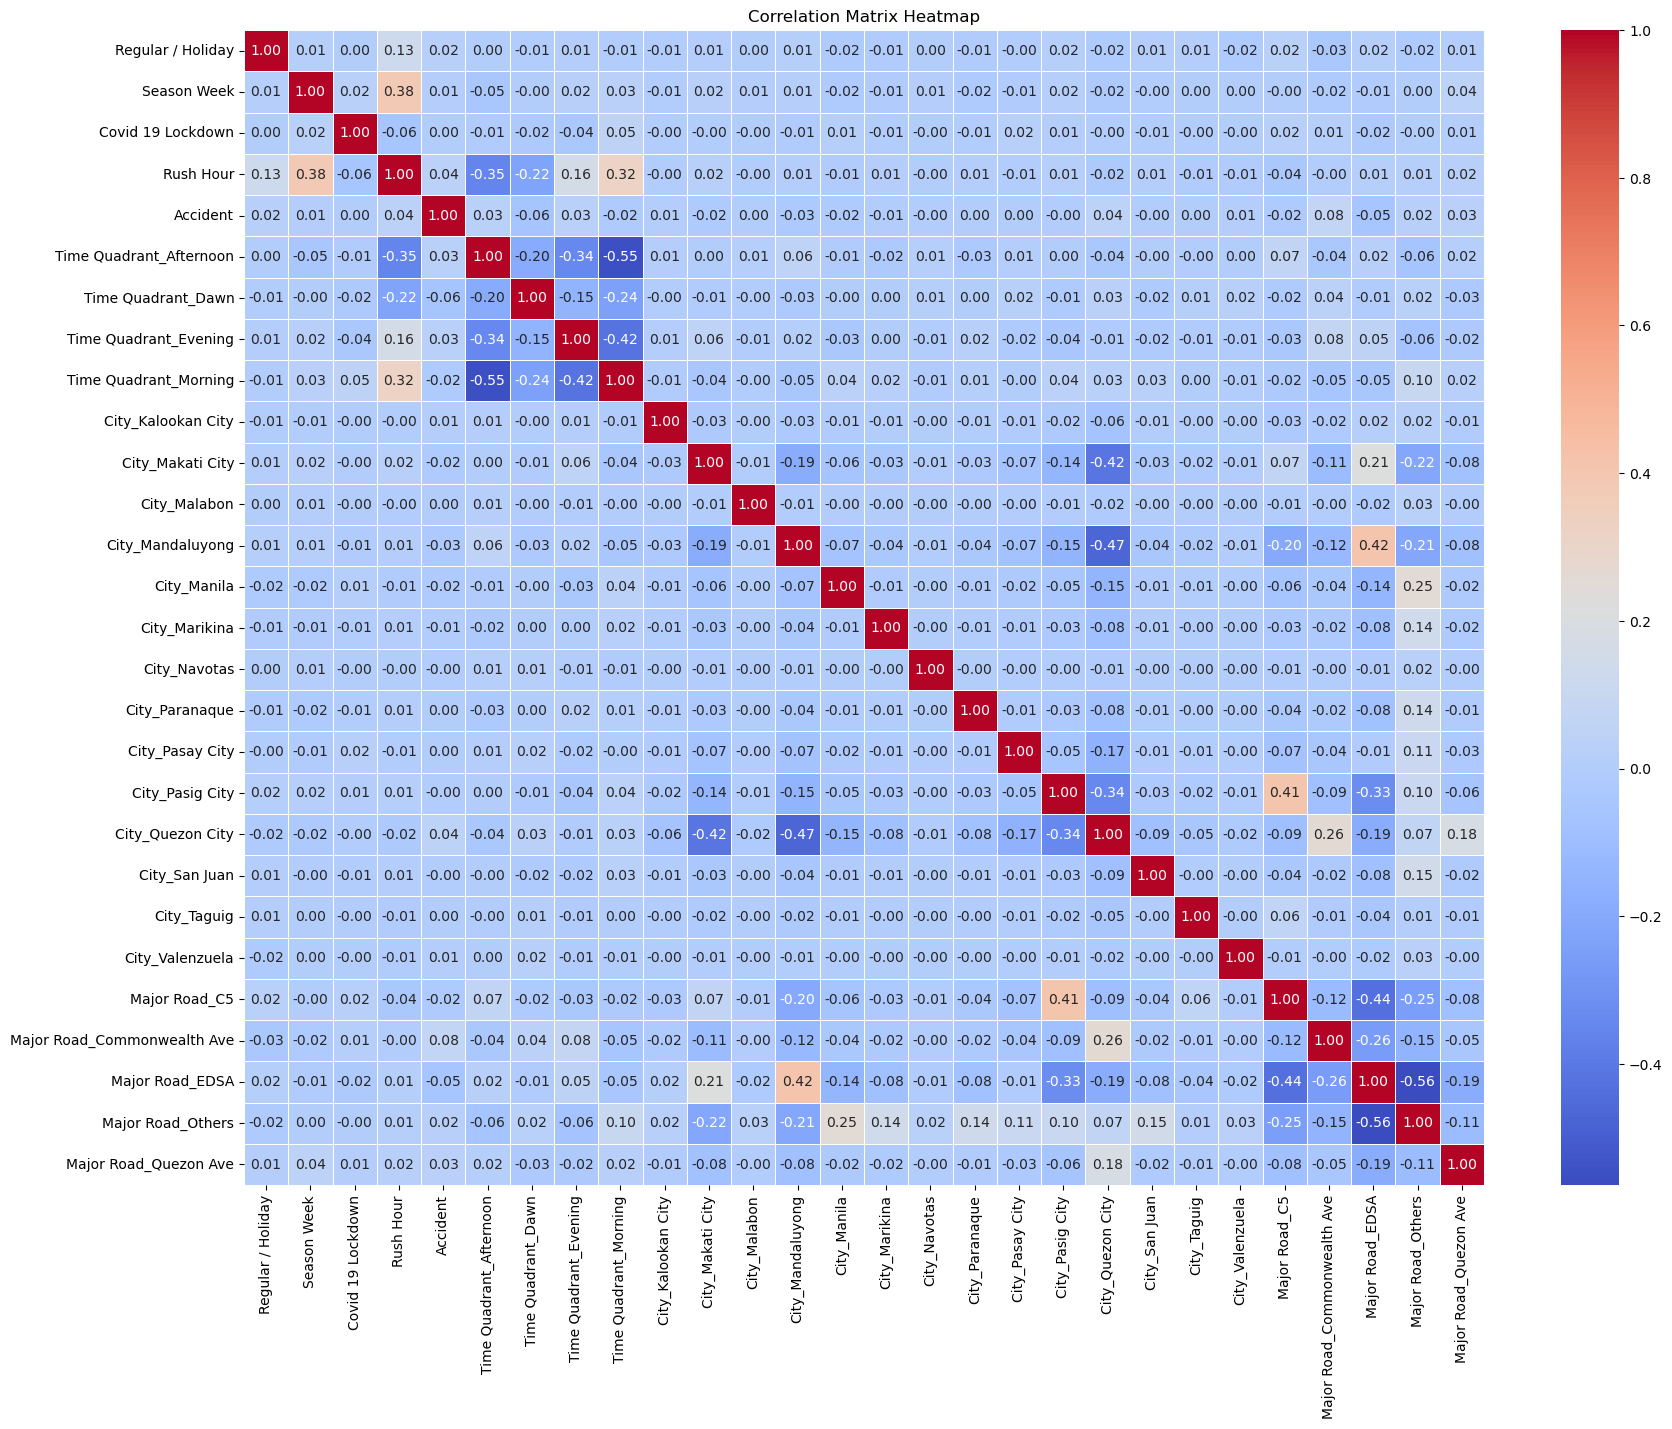

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = new_df.corr()
plt.figure(figsize=(20, 15))  # Set the figure size 
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

It appears that theres no high correlation values between the features. Thus, we can include all the futures in our Classifier Model.

### Build a Model

In [10]:
X_tab = new_df.drop(["Accident"], axis=1)
y_tab = new_df["Accident"]

In [11]:
X_init = X_tab.values
y = y_tab.values

#### Feature Scoring

In [12]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import KFold, cross_val_score

best_features = SelectKBest(score_func=chi2, k=27)
fit = best_features.fit(X_init, y)

##### Create a dataframe to identify the feature scores

In [13]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_tab.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Features', 'Score']
feature_scores.sort_values(by='Score', ascending=False)

,Features,Score
23,Major Road_Commonwealth Ave,90.574719
5,Time Quadrant_Dawn,54.008270
24,Major Road_EDSA,22.810445
26,Major Road_Quezon Ave,15.429174
18,City_Quezon City,15.392158
3,Rush Hour,14.986776
11,City_Mandaluyong,12.416126
6,Time Quadrant_Evening,9.219377
4,Time Quadrant_Afternoon,8.931494
25,Major Road_Others,5.445566


+ Low feature score tells us that it doesn't affect the future odds to be likely happen for accident occurence.
+ Thus, we can drop the features with a score of 2% below (from City_Valenzuela to City_Malabon) to reduce the features that we need to preprocess.

In [14]:
X_tab_new = X_tab.drop(["City_Mandaluyong", "Major Road_Commonwealth Ave", 
                        "Regular / Holiday", "Time Quadrant_Dawn", "Covid 19 Lockdown", "Season Week"],axis=1)
X = X_tab_new.values

Re Plot on Correlation Matrix

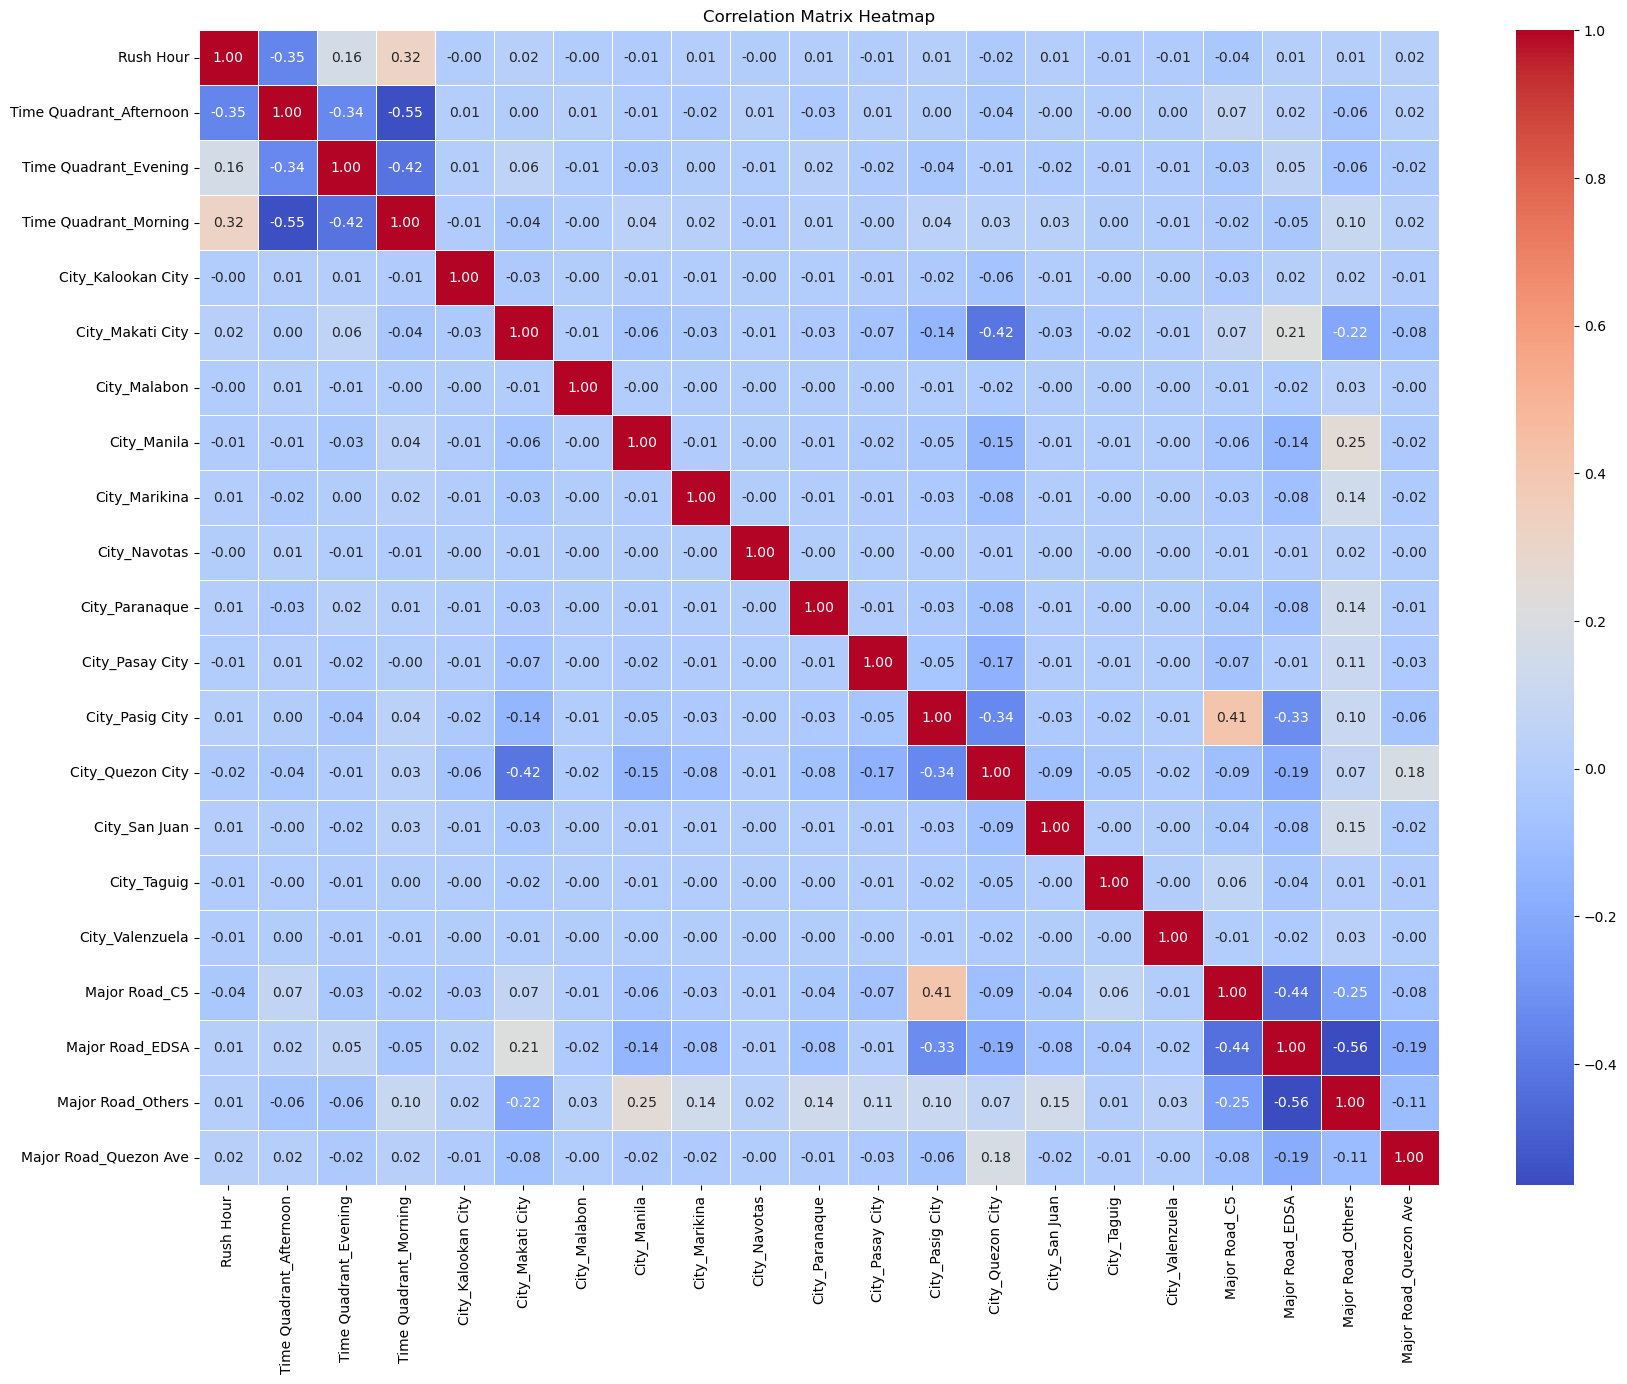

In [16]:
correlation_new = X_tab_new.corr()
plt.figure(figsize=(20, 15))  # Set the figure size 
sns.heatmap(correlation_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Scaling

+ Since we are dealing with integer binary values of features. It is not necessary for scaling.

##### PCA

+ `PCA` will not be considered since all of our dataset variables are dealing with categorical features and we are done with feature scoring.

##### Checking and Addressing Class Imbalance

In [15]:
y.shape[0] #total count

16963

In [16]:
sum(y) #sum of 1's

12656

In [17]:
sum(y)/y.shape[0] * 100

74.60944408418322

+ 75% of our target are 1's or Road Accident occurence.  we need to balance it by 50% for fair distribution with Non-Accident related target.

##### Split the Data (Train and Test)

In [18]:
from sklearn.model_selection import train_test_split
# Split the data by using first the original data distribution.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)

(11365, 21)
(5598, 21)


### Oversample the Dataset

In [19]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

Lets check the number of samples in each class to ensure that they are equal:

In [21]:
y_train.shape

(16994,)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Oversampling
oversample = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_over, y_over = oversample.fit_resample(X, y)

#OUndersampling
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_under, y_under = undersample.fit_resample(X, y)

##### Oversample

In [22]:
print("Oversampled X shape: ", X_train.shape)
print("Oversampled target shape: ", y_train.shape)
print("Distribution percentage: ", sum(y_train)/y_over.shape[0]*100,"%")

Oversampled X shape:  (16994, 21)
Oversampled target shape:  (16994,)


NameError: name 'y_over' is not defined

##### Undersample

In [22]:
print("Undersampled X shape: ", X_under.shape)
print("Undersampled target shape: ", y_under.shape)
print("Distribution percentage: ", sum(y_under)/y_under.shape[0]*100,"%")

Undersampled X shape:  (8614, 14)
Undersampled target shape:  (8614,)
Distribution percentage:  50.0 %


from sklearn.model_selection import train_test_split
# Split the data by using first the original data distribution.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)

##### Split the Oversampled/Undersampled Balanced Data (Train and Test)

In [24]:
from sklearn.model_selection import train_test_split
# Split the data
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=100)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=100)
print("Oversampled train shape:", X_train_over.shape)
print("Oversampled test shape:", X_test_over.shape)
print("Undersampled train shape:", X_train_under.shape)
print("Undersampled test shape:", X_test_under.shape)

Oversampled train shape: (20249, 14)
Oversampled test shape: (5063, 14)
Undersampled train shape: (6891, 14)
Undersampled test shape: (1723, 14)


##### Using 10-fold Cross Validation

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Best parameters of RF Classifier
model = RandomForestClassifier(max_depth=39, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=15) 

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross Validation for Oversampled Data
scores_over = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validation scores on Oversampled Data: {}".format(scores_over))

Cross-validation scores on Oversampled Data: [0.57764706 0.56529412 0.53470588 0.55823529 0.56444968 0.57916421
 0.54090642 0.56621542 0.54796939 0.56974691]


In [26]:
print("Average cross-validation score (Over): {:.2f}".format(scores_over.mean()))
print("Average cross-validation score (Under): {:.2f}".format(scores_under.mean()))

Average cross-validation score (Over): 0.56
Average cross-validation score (Under): 0.56


+ Thus, we will use the Undersampled Data since it got the best cross validation score compared to Oversampled data.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

k_best = 14  # Number of top features to select

# Feature selection using Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=model, n_features_to_select=k_best)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train a Random Forest model on the selected features
model.fit(X_train_rfe, y_train_under)

# Make predictions on the test set
y_pred_rfe = model.predict(X_test_rfe)

# Evaluate the model
accuracy_rfe = accuracy_score(y_test, y_pred)
print("Accuracy with RFE:", accuracy_rfe)

#### Randomized Search CV (Takes a lot of time to load, better to copy the result then apply those parameter for Random Forest)

In [66]:
import mglearn
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf_classifier = RandomForestClassifier()
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # Randomly sample 10 values from 100 to 1000
    'max_depth': [None] + list(np.random.randint(10, 110, size=10)),  # Randomly sample 10 values between 10 and 110
    'min_samples_split': [2, 5, 10, 15],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2']  
}

random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=10,  # Number of cross-validation folds
    scoring='accuracy',  # The metric to optimize
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available CPU cores
)

random_search.fit(X_train_under, y_train_under)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 35, 47, 87, 82, 23,
                                                      63, 103, 44, 65, 48],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy')

In [67]:
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Best parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 48}
Best cross-validation score: 0.56


#### Using Random Forest Classifier

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(models):
    indices = np.argsort(models.feature_importances_)
    n_features = X_tab_new.shape[1]
    plt.barh(np.arange(n_features), models.feature_importances_[indices], align='center')
    plt.yticks(np.arange(n_features), X_tab_new.columns[indices])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [29]:
from sklearn.ensemble import RandomForestClassifier #for classification

ran_for = RandomForestClassifier(n_estimators= 700, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 48) 
ran_for.fit(X_train_under, y_train_under)
y2_pred = ran_for.predict(X_test_under)

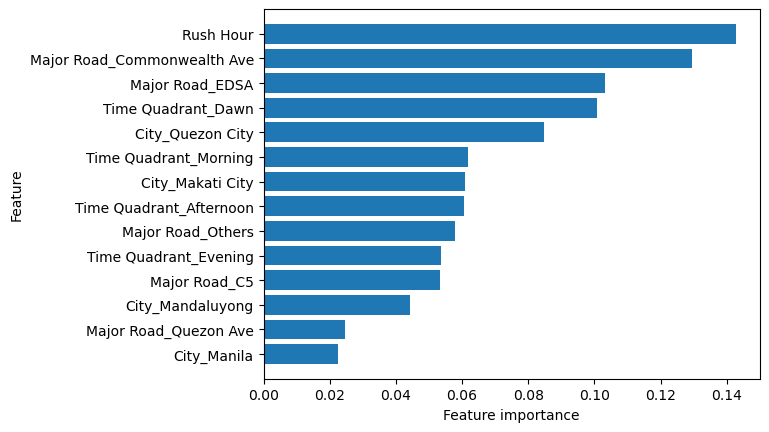

In [30]:
plot_feature_importances(ran_for)

Create dataframe for the Feature Importance

In [31]:
df_feature = pd.DataFrame(ran_for.feature_importances_)
df_columns_fi = pd.DataFrame(X_tab_new.columns)
feature_imp = pd.concat([df_columns_fi, df_feature], axis=1)
feature_imp.columns = ['Features', 'Feature Importance']
feature_imp.sort_values(by='Feature Importance', ascending=False)

,Features,Feature Importance
0,Rush Hour,0.142726
10,Major Road_Commonwealth Ave,0.129420
11,Major Road_EDSA,0.103288
2,Time Quadrant_Dawn,0.100618
8,City_Quezon City,0.084817
4,Time Quadrant_Morning,0.061746
5,City_Makati City,0.060961
1,Time Quadrant_Afternoon,0.060448
12,Major Road_Others,0.057829
3,Time Quadrant_Evening,0.053554


In [32]:
from sklearn.metrics import accuracy_score, classification_report
accuracy2 = accuracy_score(y_test_under, y2_pred)
report2 = classification_report(y_test_under, y2_pred)
print(f"Accuracy: {accuracy2}")
print(report2)

Accuracy: 0.575159605339524
              precision    recall  f1-score   support

           0       0.56      0.63      0.60       851
           1       0.59      0.52      0.55       872

    accuracy                           0.58      1723
   macro avg       0.58      0.58      0.57      1723
weighted avg       0.58      0.58      0.57      1723



Accuracy: 0.575159605339524
+ This is another measure of the overall correctness of the model, calculated as the ratio of correctly predicted instances to the total instances. It's essentially the same as the test set score.

Precision, Recall, F1-Score, Support:
+ These are metrics that provide more insight into the model's performance, especially in binary classification problems.

    + `Precision` is the ratio of true positive predictions to the total predicted positives. It is a measure of the accuracy of the positive predictions.

    + `Recall` is the ratio of true positive predictions to the total actual positives. It is a measure of the ability of the model to capture all the positives. 

    + The `F1-score` is the harmonic mean of precision and recall. It provides a balance between precision and recall. 

    + `Support: ` The number of actual occurrences of the class in the specified dataset. It provides context to the other metrics.

    + `Macro Avg, Weighted Avg: `These are averages of the precision, recall, and F1-score across all classes. Macro average gives equal weight to all classes, while weighted average considers the number of instances of each class.

Text(0.5, 1.0, 'Confusion Matrix')

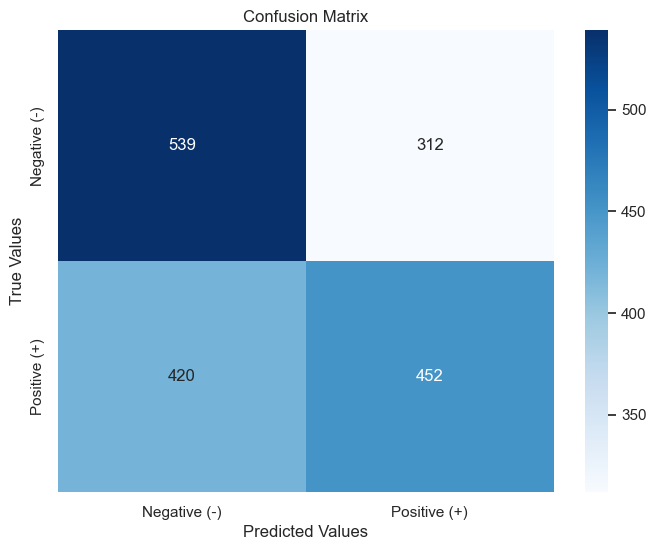

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

CM = metrics.confusion_matrix(y_test_under, y2_pred)
class_names = ['Negative (-)', 'Positive (+)']
plt.figure(figsize=(8,6))
sns.heatmap(CM,annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')

+ `True Negative (-,-) : 540 (56% True Prediction for Non-Occurence of Accident)`
+ False Negative (+,-) : 420  (44% False Prediction for Non-Occurence of Accident)

+ False Positive (-,+) : 311 (41% False Prediction for Occurence of Accident)
+ `True Positive (+,+) : 452  (59% True Prediction for Occurence of Accident)`

We will accept this since our concern is to Minimize the occurence of Accident even our model did not perform well considering some Feature Selection, Hyperparameter and Cross Validation performance.

# Prescriptive Analytics

In [34]:
predicted_proba2 = ran_for.predict_proba(X_test_under)
predicted_proba2

array([[0.62460908, 0.37539092],
       [0.40071566, 0.59928434],
       [0.22884815, 0.77115185],
       ...,
       [0.61549966, 0.38450034],
       [0.44415836, 0.55584164],
       [0.40756409, 0.59243591]])

We are just interested with the probability of getting 1 to be able to have an insights of which event might lead to highest possibility for accident to avoid it in the future.

In [35]:
predicted_proba2[:,1]

array([0.37539092, 0.59928434, 0.77115185, ..., 0.38450034, 0.55584164,
       0.59243591])

In [36]:
predicted_proba2[:,1].shape

(1723,)

In [37]:
# Assuming predicted_proba2 is your array of predicted probabilities
threshold = 0.5

# Convert probabilities to binary
predicted_binary = np.where(predicted_proba2 >= threshold, 1, 0)

# Now, predicted_binary contains the binary values (0 or 1)
predicted_binary[:,1]

array([0, 1, 1, ..., 0, 1, 1])

In [38]:
sum(predicted_binary[:,1]) #total count of test occurence

764

In [39]:
len(predicted_binary[:,1]) #total count of overall predicted target test.

1723

In [40]:
sum(predicted_binary[:,1])/len(predicted_binary[:,1]) #percentage of occurence upon testing

0.4434126523505514

In [41]:
y_test_under.shape

(1723,)

In [42]:
sum(y_test_under)

872

In [43]:
plot_table = pd.DataFrame(columns = X_tab_new.columns.values, data = X_test_under)
plot_table['Predicted_Binary'] = np.transpose(predicted_binary[:,1])
plot_table['Probability'] = np.transpose(predicted_proba2[:,1])
plot_table

,Rush Hour,Time Quadrant_Afternoon,Time Quadrant_Dawn,Time Quadrant_Evening,Time Quadrant_Morning,City_Makati City,City_Mandaluyong,City_Manila,City_Quezon City,Major Road_C5,Major Road_Commonwealth Ave,Major Road_EDSA,Major Road_Others,Major Road_Quezon Ave,Predicted_Binary,Probability
0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0.375391
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.599284
2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0.771152
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0.586984
4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.290527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0.423069
1719,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0.468913
1720,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0.384500
1721,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0.555842


#### Lowest Probability of Road Accident occurence

In [50]:
lowest_proba = plot_table['Probability'].min()
lowest_proba

0.10344916720436902

In [51]:
result_min = plot_table[plot_table['Probability'] == lowest_proba]
result_min = result_min.loc[:, (result_min != 0).any(axis=0)]
result_min

,Time Quadrant_Dawn,City_Makati City,Major Road_Others,Probability
414,1,1,1,0.103449


My model suggest that the lowest probability of accident occurence will be held during time of a day in `Time Quadrant_Dawn` that possiblly occured at `City_Makati City` along `Major Road_Others` (Roads within Makati City) based on the learned model with a given dataset available.

#### Highest Probability of Road Accident

In [52]:
highest_proba = plot_table['Probability'].max()
highest_proba

0.9848311561579602

In [53]:
result_max = plot_table[plot_table['Probability'] == highest_proba]
result_max = result_max.loc[:, (result_max != 0).any(axis=0)]
result_max

,Time Quadrant_Dawn,Major Road_EDSA,Predicted_Binary,Probability
952,1,1,1,0.984831
1285,1,1,1,0.984831
1481,1,1,1,0.984831


My model suggest that the highest probability of accident occurence will be held during time of a day in `Time Quadrant_Dawn` that possiblly occured with no given specific city. This means it belongs among the Cities that we dropped along `Major Road_EDSA` based on the learned model with a given dataset available.

#### Greater than 90% Probability of Road Accident

In [54]:
proba_90 = plot_table['Probability'] >=0.90
result_90 = plot_table[proba_90]
result_90 = result_90.loc[:, (result_90 != 0).any(axis=0)]

result_90

,Rush Hour,Time Quadrant_Afternoon,Time Quadrant_Dawn,City_Quezon City,Major Road_EDSA,Major Road_Quezon Ave,Predicted_Binary,Probability
122,1,1,0,1,0,1,1,0.946711
221,1,1,0,1,0,1,1,0.946711
664,1,1,0,1,0,1,1,0.946711
952,0,0,1,0,1,0,1,0.984831
1285,0,0,1,0,1,0,1,0.984831
1481,0,0,1,0,1,0,1,0.984831


+ My model suggest that the highest probability of accident occurence will be held during time of a day in `Time Quadrant_Dawn` that possiblly occured with no given specific city. This means it belongs among the Cities that we dropped along `Major Road_EDSA` based on the learned model with a given dataset available.

+ The second highest probability of road accident occurence of 94% will be held during `Rush Hour`, time of a day in `Time Quadrant_Afternoon` that possibly occured at `City_Quezon City` along `Major Road_Quezon Ave` based on the learned model I deploy.

Save to .xlsx file for plotting at Excel file

In [45]:
plot_table.to_excel('Predicted_Values_for_plotting.xlsx', index=False)

Rush Hour vs. Probability of Accident

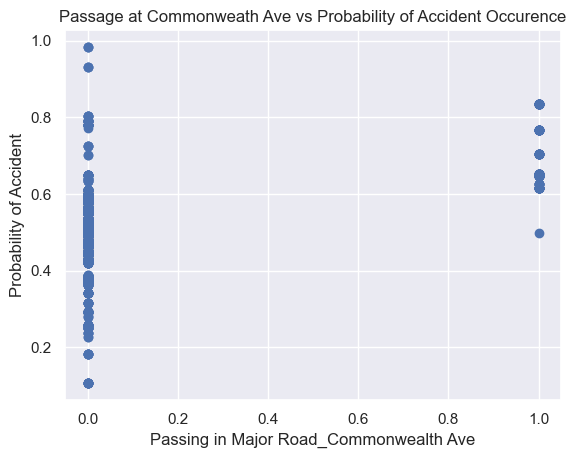

In [58]:
plt.scatter(plot_table['Major Road_Commonwealth Ave'], plot_table['Probability'])
# Add labels and a title
plt.xlabel('Passing in Major Road_Commonwealth Ave')
plt.ylabel('Probability of Accident')
plt.title('Passage at Commonweath Ave vs Probability of Accident Occurence')
plt.show()

In every instance that we pass on Commonwealth Ave in Quezon City,  theres a greater chance to occur accident. This is just a suggestion that we mas be very very cautious when passing.

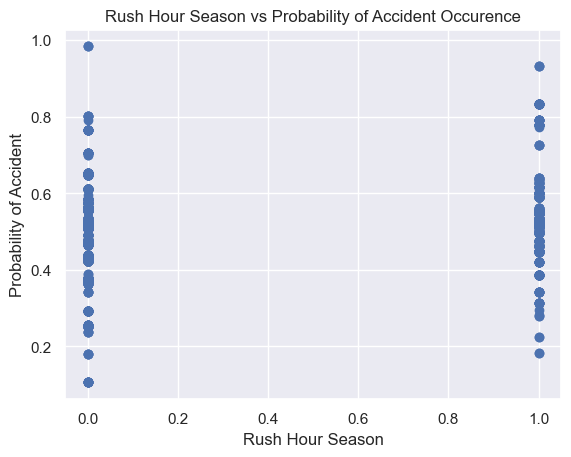

In [60]:
plt.scatter(plot_table['Rush Hour'], plot_table['Probability'])
# Add labels and a title
plt.xlabel('Rush Hour Season')
plt.ylabel('Probability of Accident')
plt.title('Rush Hour Season vs Probability of Accident Occurence')
plt.show()

In [61]:
sum(plot_table['Rush Hour'])

632

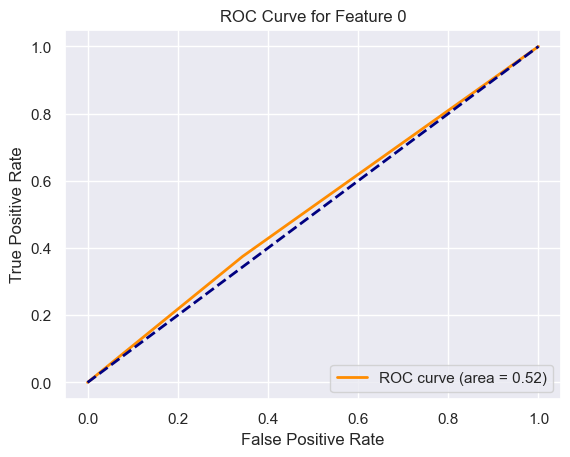

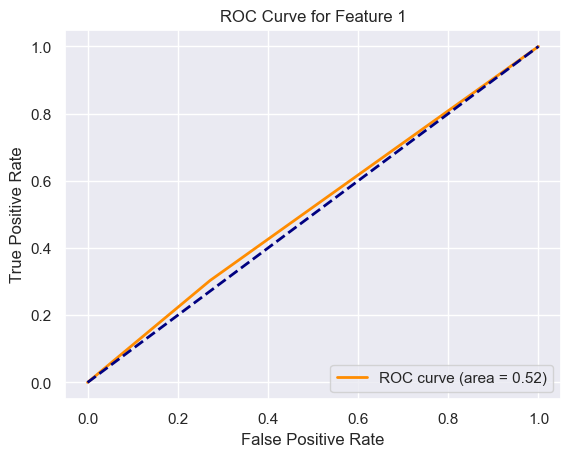

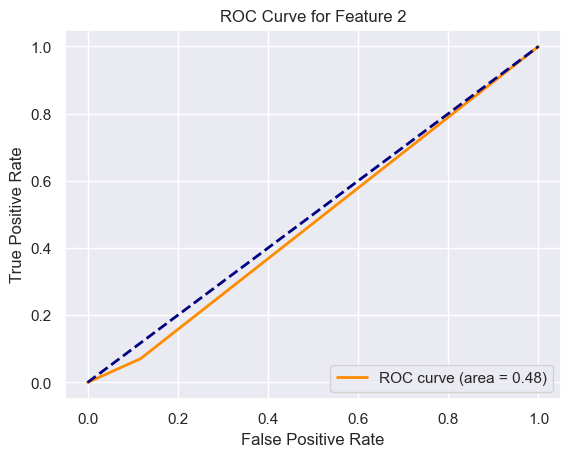

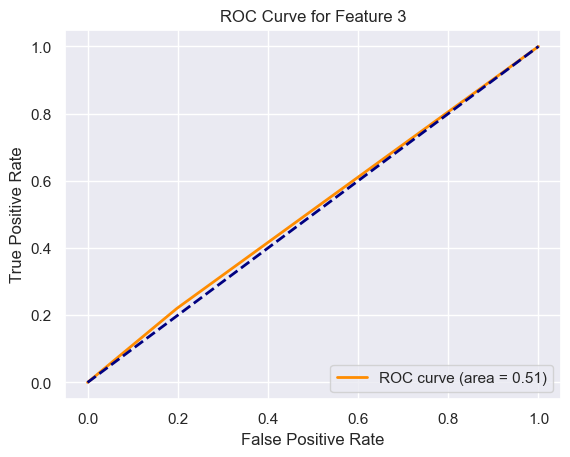

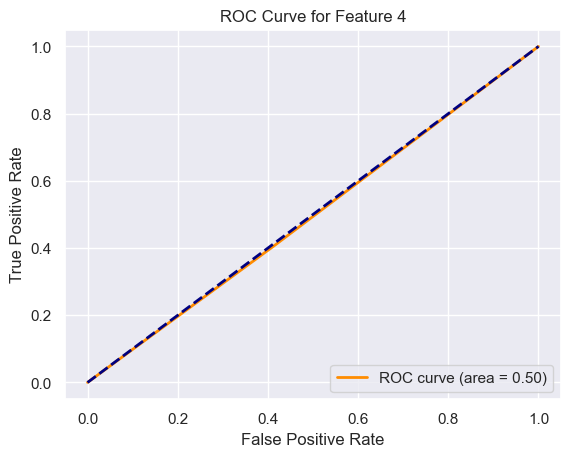

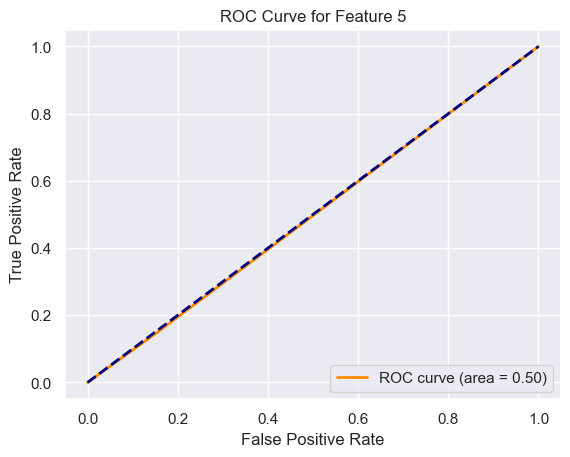

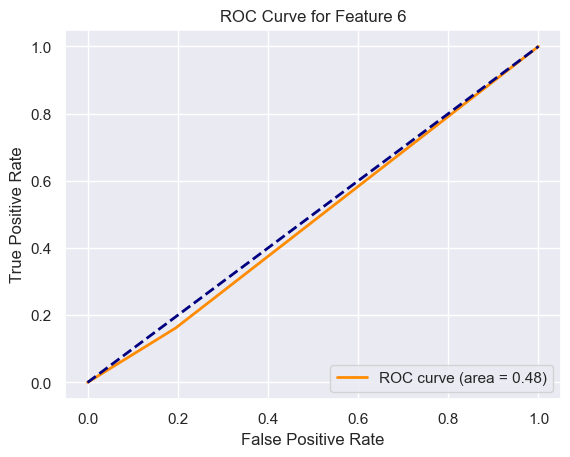

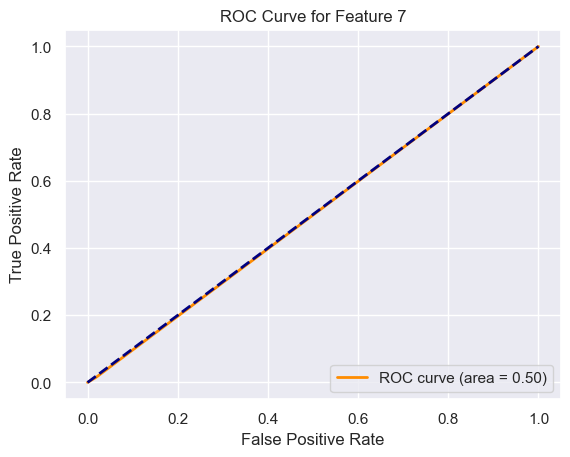

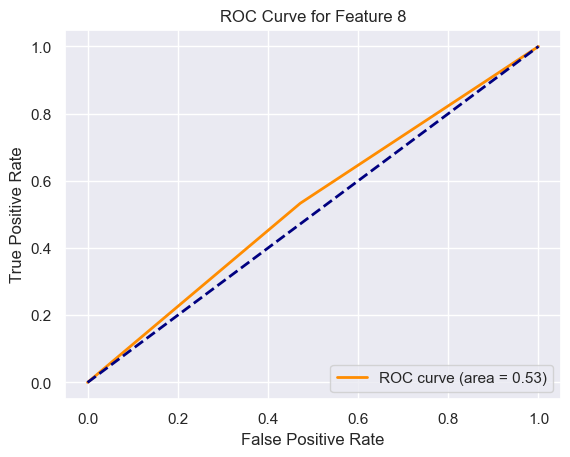

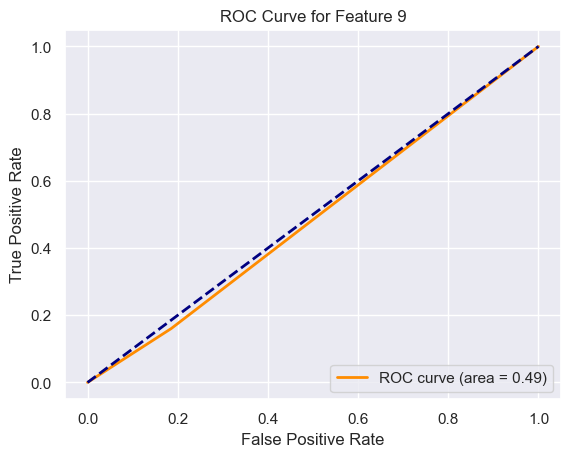

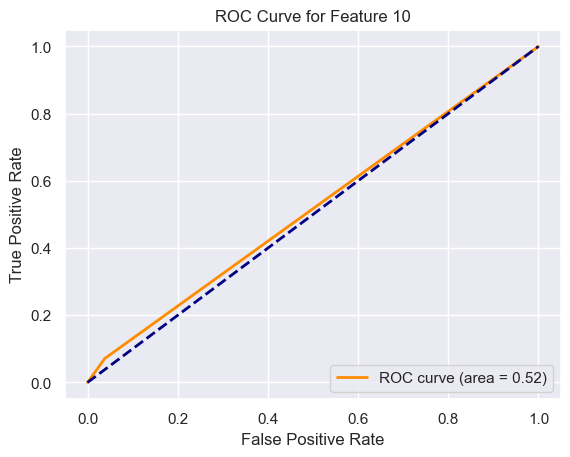

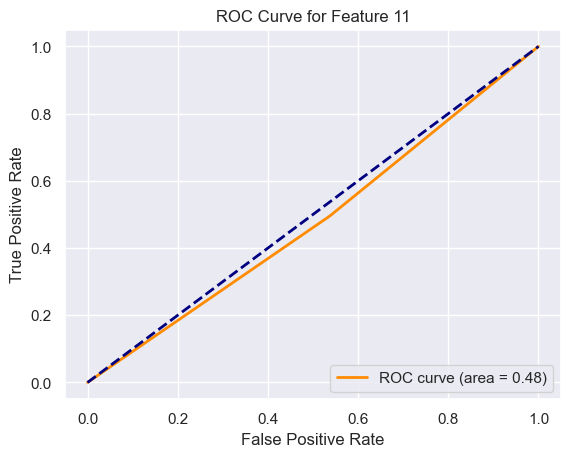

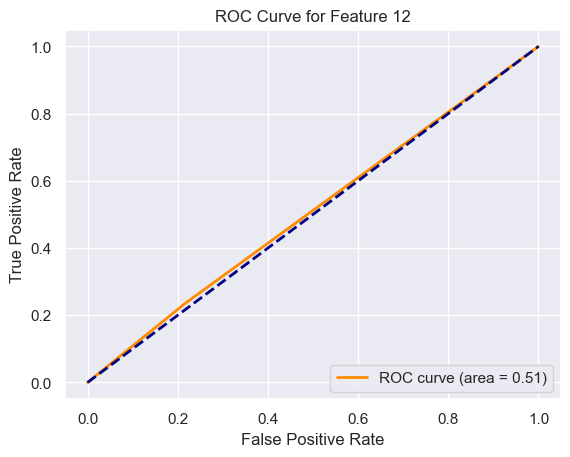

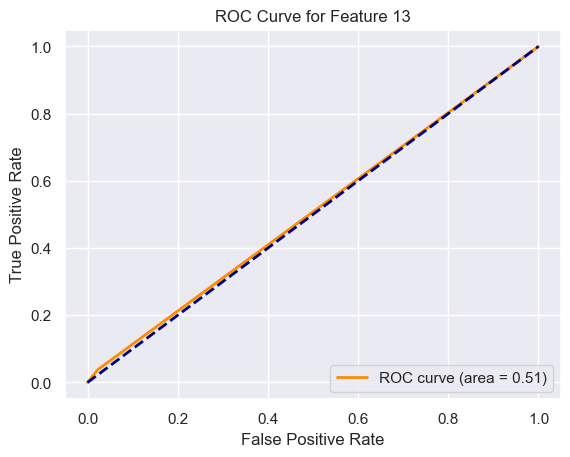

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Example: Using Logistic Regression
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators= 700, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 48))
classifier.fit(X_train_over, y_train_over)

for i in range(X_tab_new.shape[1]):  # Assuming X has shape (n_samples, n_features)
    feature_values = X_test_over[:, i]
    fpr, tpr, _ = roc_curve(y_test_over, feature_values)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each feature
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Feature {}'.format(i))
    plt.legend(loc='lower right')
    plt.show()

This simply tells us that having an `ROC curve AUC = 0.5` have a poor model that 50% of predicted target will just randomize the outcome between true prediction vs False Prediction. Thus, even the Machine Learning Model cannot be able to predict the future accident with a limited features and refer. This model just tell the important features that affect the possibility of accident based on the provided data from August 2018 to December 2020.